# Histogram Equalization


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

From Homework 1:

In [2]:
def image_histogram_equalization(image, number_bins=256):
    img_array = np.asarray(image)
    
    """
    Part (a): Normalized cumulative histogram
    """
    
    # Calculate histogram aka probability density function via binning, and normalize
    histogram_array = np.bincount(img_array.flatten().astype('int64'), minlength=number_bins)
    

    # Calculate cumulative histogram aka cumulative density function
    chistogram_array = np.empty([number_bins,1])
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    chistogram_array = np.cumsum(histogram_array)
    print(chistogram_array.shape)


    """
    Part (c): compute the transform map T using cdf
    """
    transform_map = np.floor((number_bins-1) * chistogram_array).astype(np.uint8)


    """
    STEP 3: Apply the transformation T to reassign equalized pixel intensity 
    """
    # flatten image array into 1D list
    img_list = list(img_array.flatten())
    # print(img_list)
    # transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in img_list]

    # reshape and write back into img_array
    eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)


    return eq_img_array

In [3]:
def load_rgb(path, display=True):
    img_crowd = cv2.imread(path)

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img_crowd, cv2.COLOR_BGR2RGB))

    return img_crowd

def equalize_rgb(img, bins=256, display=True):
    img_equalized = image_histogram_equalization(img, bins)

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(np.float32(img_equalized))
        # plt.imshow(cv2.cvtColor(img_equalized, cv2.COLOR_BGR2RGB))


    return img_equalized

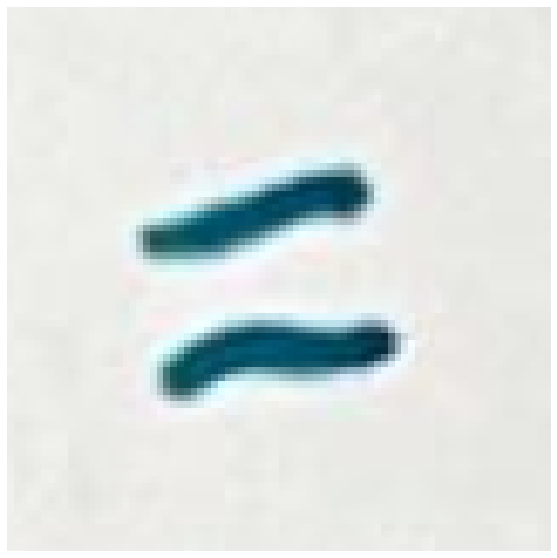

In [4]:
img = load_rgb('../dataset/handwritten_operators/equal/blue = 3.png')

# for i in range(1, 64, 4):
#     print("bins: " + str(i))
#     equalize_rgb(img, i)

# Thresholding

Threshold on the median

In [5]:
def median_threshold(img, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    median = np.median(img_gray)

    img_gray[img_gray >= median] = 255
    img_gray[img_gray < median] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256,)


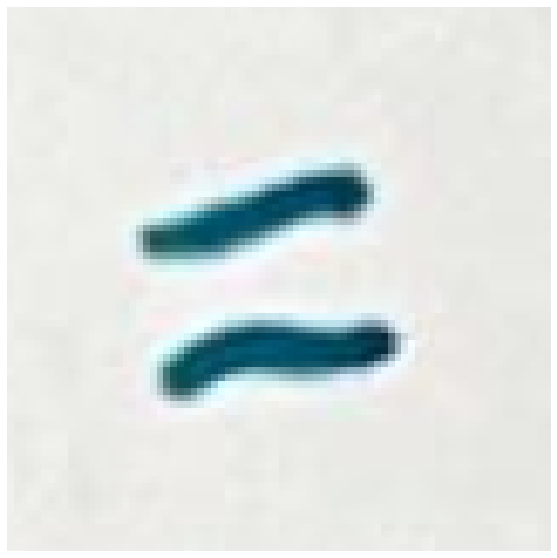

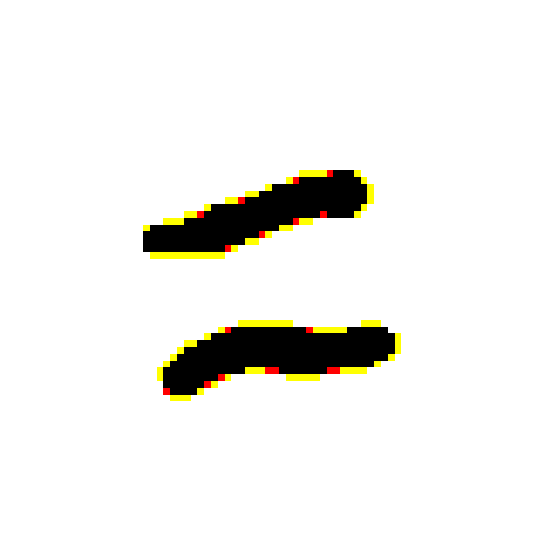

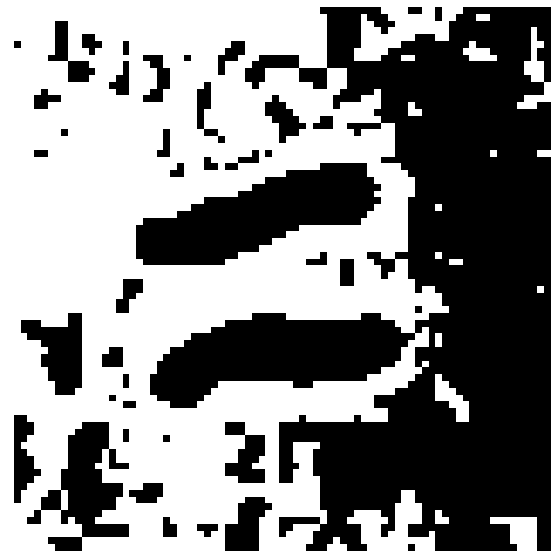

In [6]:
img = load_rgb('../dataset/handwritten_operators/equal/blue = 3.png')
img = equalize_rgb(img, 16)
img = median_threshold(img)

Arbitrary threshold

In [7]:
def threshold(img, threshold, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # img_gray = img
    
    img_gray[img_gray >= threshold] = 255
    img_gray[img_gray < threshold] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

In [8]:
def mean_threshold(img, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # print(img_gray)
    mean = np.mean(img_gray)

    img_gray[img_gray >= mean] = 255
    img_gray[img_gray < mean] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256,)


array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ..., 255,   0,   0]], dtype=uint8)

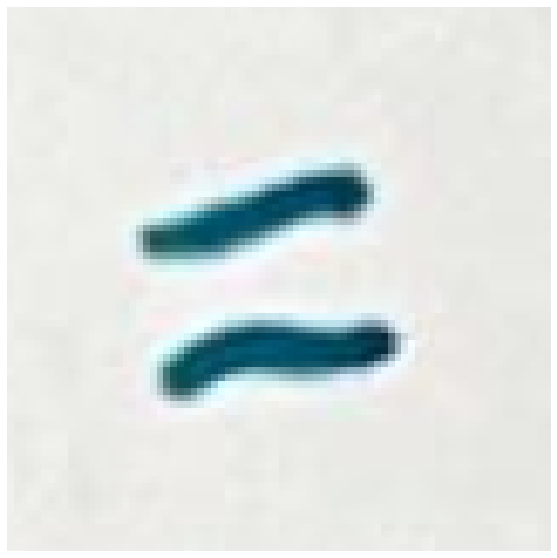

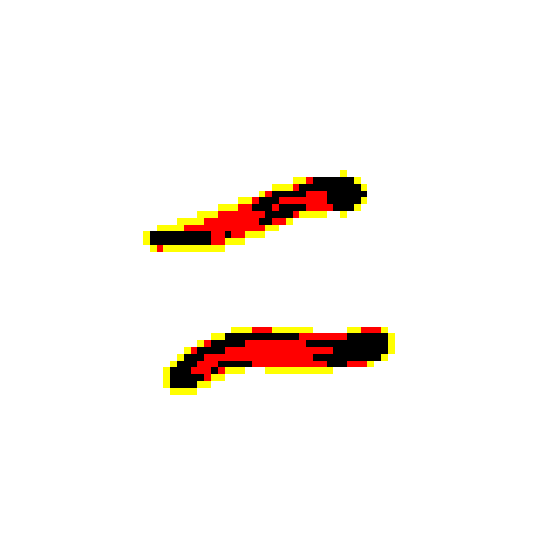

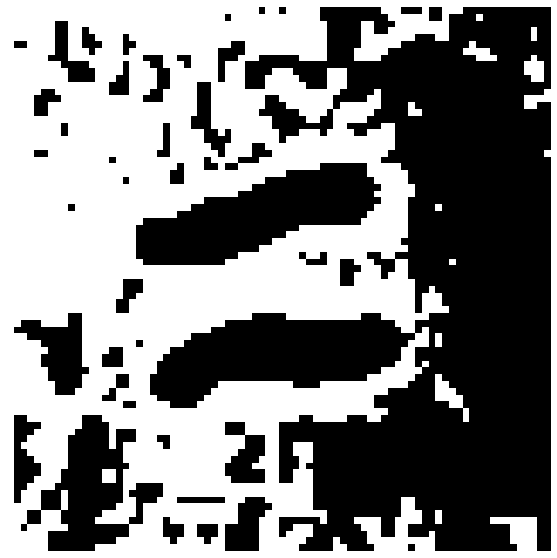

In [9]:
img = load_rgb('../dataset/handwritten_operators/equal/blue = 3.png')
img2 = equalize_rgb(img, 24)

# for i in range(1, 20):
#     threshold(img, i*.5)
mean_threshold(img2)

Blur + Hist-eq + Mean Threshold

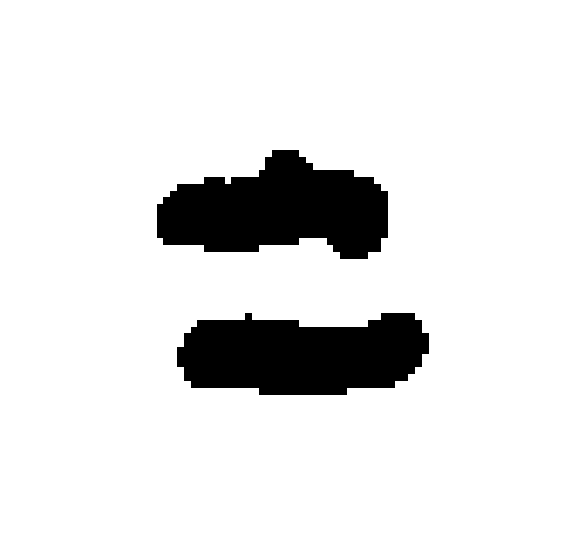

In [27]:
img = cv2.imread('../dataset/handwritten_operators/equal/blue = 2.png')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.blur(img, (5, 5))

img = mean_threshold(img)

# img = image_histogram_equalization(img,200)

# img = cv2.blur(img, (5, 5))

plt.axis('off')
plt.imshow(img, cmap='gray')